# WS 07

In [195]:
import numpy as np
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()

In [196]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [197]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [198]:
X_test.shape , y_test.shape

((10000, 28, 28), (10000,))

In [199]:
X_train[0][:, 7:20]
X_train[0,:, 7:20]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26],
       [  0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172],
       [ 49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251,  93,  82],
       [ 18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241,   0,   0],
       [  0,  80, 156, 107, 253, 253, 205,  11,   0,  43, 154,   0,   0],
       [  0,   0,  14,   1, 154, 253,  90,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 139, 253, 190,   2,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  11, 190, 253,  70,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  35, 

In [200]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [201]:
np.min(X_train), np.max(X_train)

(0, 255)

In [202]:
np.isnan(X_train).sum()

0

In [203]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


# Ws 08

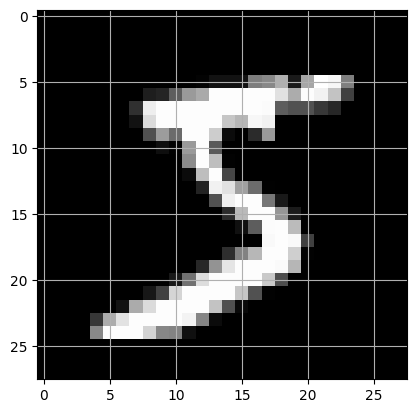

In [204]:
import matplotlib.pyplot as plt

img = X_train[0]
plt.imshow(img, cmap=plt.cm.gray)
#plt.imshow(img, cmap=plt.cm.gray_r) 

plt.grid()
plt.show()

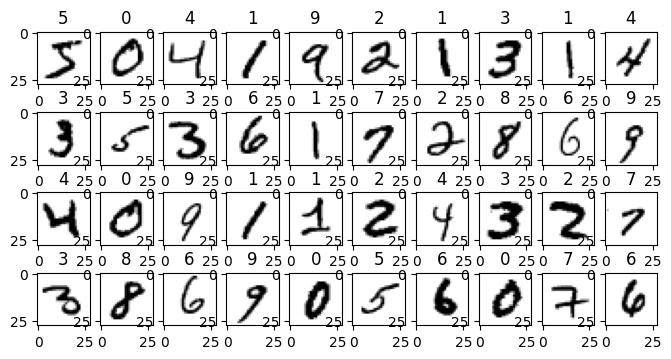

In [205]:
def visual_multi(i):
    nplots = 40
    fig = plt.figure(figsize=(8, 4)) 
    for j in range(nplots):
        plt.subplot(4, 10, j+1)
        plt.imshow(X_train[i+j], cmap=plt.cm.gray_r)
        plt.title(y_train[i+j])
    plt.show()

visual_multi(0)

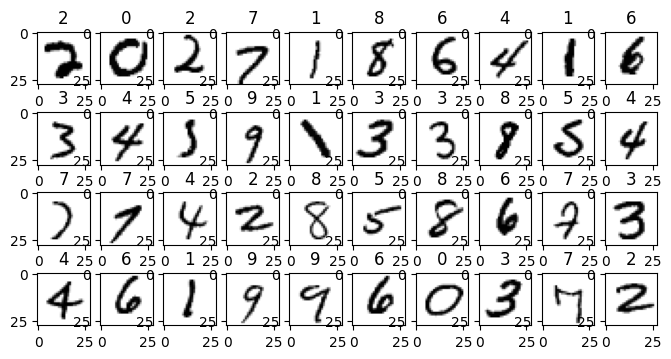

In [206]:
visual_multi(120)

# ws 09

In [207]:
print(X_train.shape)
print(X_test.shape) 

(60000, 28, 28)
(10000, 28, 28)


In [208]:
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)) # 
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

# X_train = X_train.reshape((60000, 28, 28, 1)) # 
# X_test = X_test.reshape((10000, 28, 28, 1))

# X_train = X_train.reshape(-1, 28, 28, 1)
# X_test = X_test.reshape(-1, 28, 28, 1)

X_train = np.expand_dims(X_train, -1) # 
X_test = np.expand_dims(X_test, -1)

In [209]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [210]:
np.min(X_train), np.max(X_train)

(0.0, 1.0)

In [211]:
X_train[0,10,10:15]

array([[0.00392157],
       [0.6039216 ],
       [0.99215686],
       [0.3529412 ],
       [0.        ]], dtype=float32)

select samples

In [212]:
num_samples = 10000

X_train = X_train[:num_samples]
y_train = y_train[:num_samples]

In [213]:
X_train.shape

(10000, 28, 28, 1)

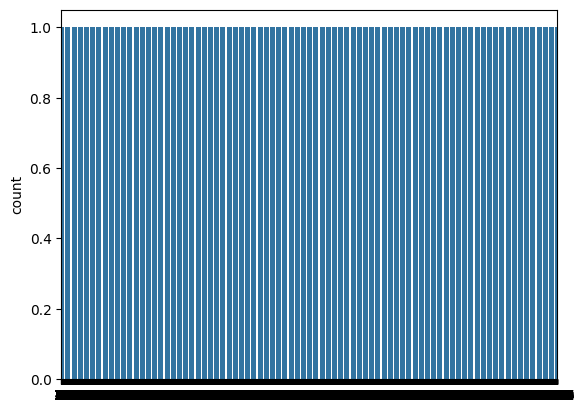

In [214]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(y_test)

plt.show()
del sns, warnings

In [215]:
print('Train: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test: X={}, y={}'.format(X_test.shape, y_test.shape))

Train: X=(10000, 28, 28, 1), y=(10000,)
Test: X=(10000, 28, 28, 1), y=(10000,)


# ws 10

In [216]:
num_classes = len(np.unique(y_train))
num_classes

10

In [217]:
in_shape = X_train.shape[1:]
in_shape

(28, 28, 1)

In [218]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=in_shape)) 
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.5)) 
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.5)) 

model.add(Dense(num_classes, activation='softmax'))

In [219]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [220]:
from tensorflow.keras.utils import plot_model

plot_model(model, 'digit.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [221]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

import time
start = time.time()

history = model.fit(X_train, y_train, epochs=15, batch_size=128, verbose=1, validation_split=0.1) 

end = time.time()

print("Time Taken: {:.2f} minutes".format((end - start)/60))

Epoch 1/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.4511 - loss: 1.6419 - val_accuracy: 0.9240 - val_loss: 0.2493
Epoch 2/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8779 - loss: 0.3849 - val_accuracy: 0.9500 - val_loss: 0.1642
Epoch 3/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9235 - loss: 0.2617 - val_accuracy: 0.9640 - val_loss: 0.1335
Epoch 4/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9382 - loss: 0.2007 - val_accuracy: 0.9640 - val_loss: 0.1280
Epoch 5/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9461 - loss: 0.1823 - val_accuracy: 0.9710 - val_loss: 0.1030
Epoch 6/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9515 - loss: 0.1681 - val_accuracy: 0.9790 - val_loss: 0.0878
Epoch 7/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.9561 - loss: 0.1420 - val_accuracy: 0.9730 - val_loss: 0.0900
Epoch 8/15
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9618 - loss: 0.1251 - val_accuracy: 0.9730 - v

In [222]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: {:.3f}'.format(score[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9764 - loss: 0.0712
Accuracy: 0.981


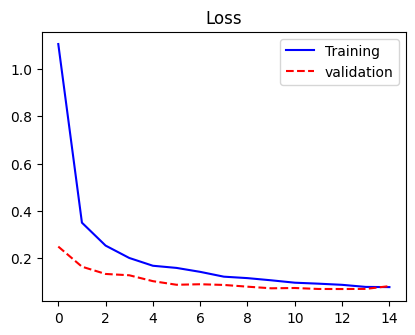

In [223]:
plt.figure(figsize=(4.7, 3.5))
plt.plot(history.history['loss'], color='b', label="Training")
plt.plot(history.history['val_loss'], 'r--', label="validation")
plt.title('Loss')
plt.legend()
plt.show()

# ws11

In [224]:
y_pred = model.predict(X_test)

y_pred_cls = np.argmax(y_pred, axis=1) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [225]:
idx_miss = np.where(y_pred_cls != y_test)

print(len(idx_miss[0]))

186


In [226]:
print(idx_miss[0][:15])

[247 266 320 321 412 445 492 495 582 684 717 720 726 740 844]


In [227]:
y_test[idx_miss][:15]

array([4, 8, 9, 2, 5, 6, 2, 8, 8, 7, 0, 5, 7, 4, 8], dtype=uint8)

In [228]:
y_pred_cls[idx_miss][:15]

array([6, 0, 1, 7, 3, 0, 8, 0, 2, 3, 6, 8, 4, 9, 7], dtype=int64)

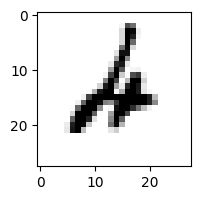

In [229]:
fig = plt.figure(figsize=(2, 2)) 
plt.imshow(X_test[idx_miss][0].reshape(28,28), cmap=plt.cm.gray_r)
plt.show()

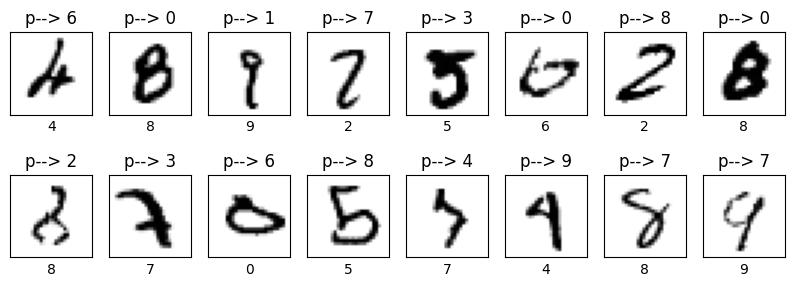

In [230]:
nplots = 16 

fig = plt.figure(figsize=(10, 3.4)) 
for j,k in enumerate(idx_miss[0]):
    plt.subplot(2, 8, j+1)
    plt.imshow(X_test[k].reshape(28, 28), cmap=plt.cm.gray_r)
    plt.title('p--> {}'.format(y_pred_cls[k]))
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_test[k])
    if j >= nplots-1:
        break
#     plt.axis('off')

plt.show()

# ws 12

In [231]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.image import rgb_to_grayscale

img = load_img('digit2.png', target_size=(28, 28))
img

In [232]:
from PIL import Image, ImageOps

img = ImageOps.invert(img)
img = img_to_array(img)
img = rgb_to_grayscale(img)

print('shape=',img.shape)
print('max pixel value=',np.max(img))

shape= (28, 28, 1)
max pixel value= 254.97452


In [233]:
img = img /255.0
print('max pixel value=',np.max(img))

max pixel value= 0.99990004


In [234]:
img = np.expand_dims(img, axis=0)
img.shape

(1, 28, 28, 1)

In [235]:
y_pred = model.predict(img)
y_pred.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [236]:
predicted = np.argmax(y_pred, -1) 
print(predicted)

[2]


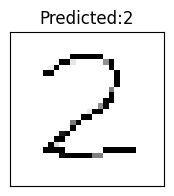

In [237]:
plt.figure(figsize=(2, 2))
plt.imshow(img[0], cmap=plt.cm.gray_r)
plt.title('Predicted:{}'. format(predicted[0]))
plt.xticks([])
plt.yticks([])
plt.show()

In [238]:
def predict_digit(imgs):
    y_pred = [] ; y_pred_cls = []; img_lst = []
    for i in imgs:
        img = load_img(i, target_size=(28, 28))
        img = ImageOps.invert(img)
        img = img_to_array(img)
        img = rgb_to_grayscale(img)

        img = img / 255.0
        img_lst.append(img)
        img = np.expand_dims(img, axis=0)

        y_pred_i = model.predict(img)
        y_pred_cls_i = np.argmax(y_pred_i, -1)
        y_pred.append(y_pred_i)
        y_pred_cls.append(y_pred_cls_i)

    return img_lst, y_pred_cls, y_pred

imgfiles = ['digit1.png','digit2.png','digit3.png','digit4.png','digit5.png','digit6.png','digit7.png','digit8.png','digit9.png','digit0.png',]

img_lst,y_pred_cls,y_pred = predict_digit(imgfiles) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


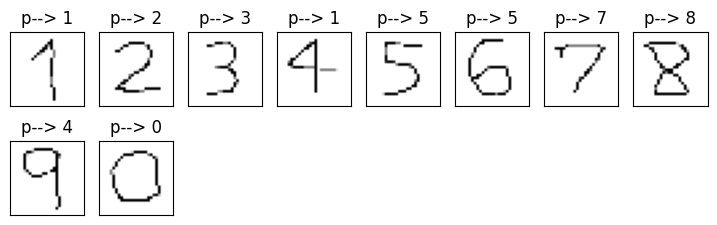

In [239]:
fig = plt.figure(figsize=(9, 2.6)) 

for i, k in enumerate(img_lst):
    plt.subplot(2, 8, i+1)
    plt.imshow(k, cmap=plt.cm.gray_r)
    plt.title('p--> {}'.format(y_pred_cls[i][0]))
    plt.xticks([])
    plt.yticks([])

plt.show()

In [240]:
model.save('digitmodel.h5')

WS 13

In [241]:
from PIL import Image, ImageOps

imgfile = 'digit0.png'
img = Image.open(imgfile).convert('L')
img = ImageOps.invert(img)
img = img.resize((8,8), Image.LANCZOS)

In [242]:
pixel = np.array(img)
pixel = pixel / 255.0 * 16
pixel = pixel.astype('int')
pixel

array([[0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 4, 4, 4, 4, 1, 0],
       [0, 3, 3, 0, 0, 2, 3, 0],
       [0, 4, 0, 0, 0, 1, 3, 0],
       [0, 4, 0, 0, 0, 0, 3, 0],
       [0, 3, 3, 0, 0, 2, 4, 0],
       [0, 0, 4, 3, 4, 4, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [243]:
digit_0_001 = pixel.reshape(1,-1)[0]
digit_0_001

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 4, 4, 4, 1, 0, 0, 3, 3, 0, 0, 2,
       3, 0, 0, 4, 0, 0, 0, 1, 3, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0,
       0, 2, 4, 0, 0, 0, 4, 3, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [244]:
imgfile = 'digit1.png'
img = Image.open(imgfile).convert('L')
img = ImageOps.invert(img)
img = img.resize((8,8), Image.LANCZOS)

In [245]:
pixel = np.array(img)
pixel = pixel / 255.0 * 16
pixel = pixel.astype('int')
pixel

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 5, 0, 0, 0],
       [0, 0, 3, 3, 3, 0, 0, 0],
       [0, 0, 1, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0]])

In [246]:
digit_1_001 = pixel.reshape(1,-1)[0]
digit_1_001

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 5, 0, 0, 0, 0, 0, 3, 3, 3, 0,
       0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [252]:
import pandas as pd 
df = pd.DataFrame([digit_0_001])
df = pd.concat([df, pd.DataFrame([digit_1_001])], ignore_index=True)

In [253]:
y = [0,1]